In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import nltk
import seaborn as sns
import re

In [2]:
data = pd.read_csv("Dataset/Cleaned_Finalset.csv", lineterminator='\n')
data.head()

,TMDB,Link,Title,Rating,Genre,Overview,Poster\r
0,862,https://www.themoviedb.org/movie/862,Toy Story,8.0,"Animation, Adventure, Family, Comedy","Led by Woody, Andy's toys live happily in his ...",/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg\r
1,8844,https://www.themoviedb.org/movie/8844,Jumanji,7.2,"Adventure, Fantasy, Family",When siblings Judy and Peter discover an encha...,/6aGn2X51bahFoOI8wE1h2VGTgcH.jpg\r
2,15602,https://www.themoviedb.org/movie/15602,Grumpier Old Men,6.5,"Romance, Comedy",A family wedding reignites the ancient feud be...,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg\r
3,31357,https://www.themoviedb.org/movie/31357,Waiting to Exhale,6.3,"Comedy, Drama, Romance","Cheated on, mistreated and stepped on, the wom...",/4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg\r
4,11862,https://www.themoviedb.org/movie/11862,Father of the Bride Part II,6.3,"Comedy, Family",Just when George Banks has recovered from his ...,/rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg\r


In [3]:
genres_fin = []
for genreslis in data['Genre']:
    genres_fin.append(genreslis.split(', '))
data['genre_new'] = genres_fin

In [4]:
# get all genre tags in a list
all_genres = sum(genres_fin,[])
len(set(all_genres))

19

In [5]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

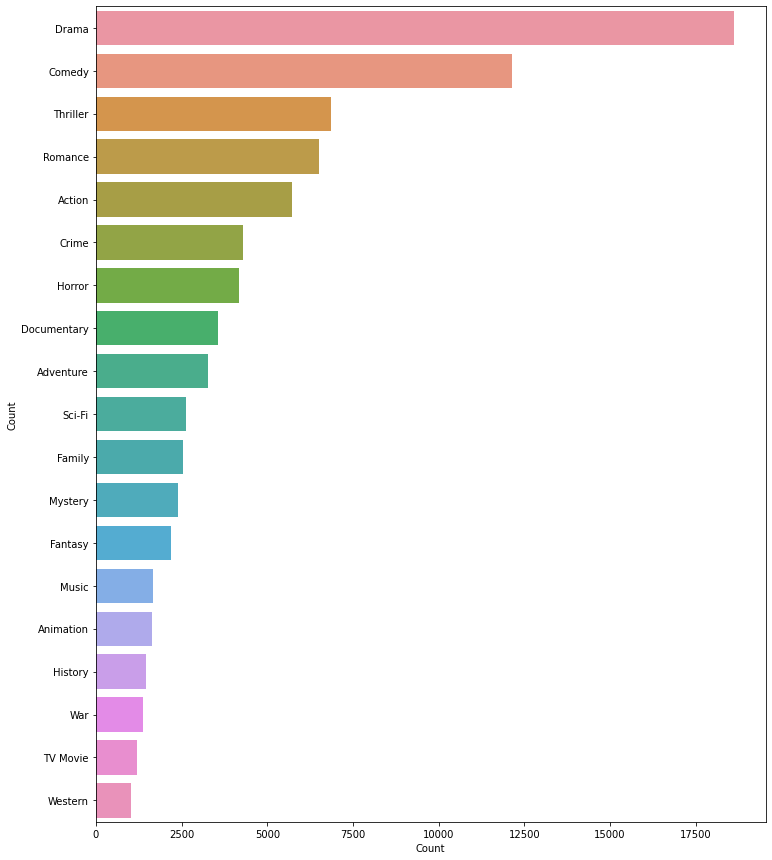

In [6]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [7]:
# function for text cleaning 
#
#
#
def clean_text(text):
    # clearing backslashes
    text = re.sub("\'", "", text) 
    # removing non alphabets
    text = re.sub("[^a-zA-Z]"," ",text) 
    # removing spaces
    text = ' '.join(text.split()) 
    # convert to lower case alphabets
    text = text.lower() 
    
    return text
movies_new = data[~(data['genre_new'].str.len() == 0)]
movies_new['clean_plot'] = movies_new['Overview'].apply(lambda x: clean_text(x))


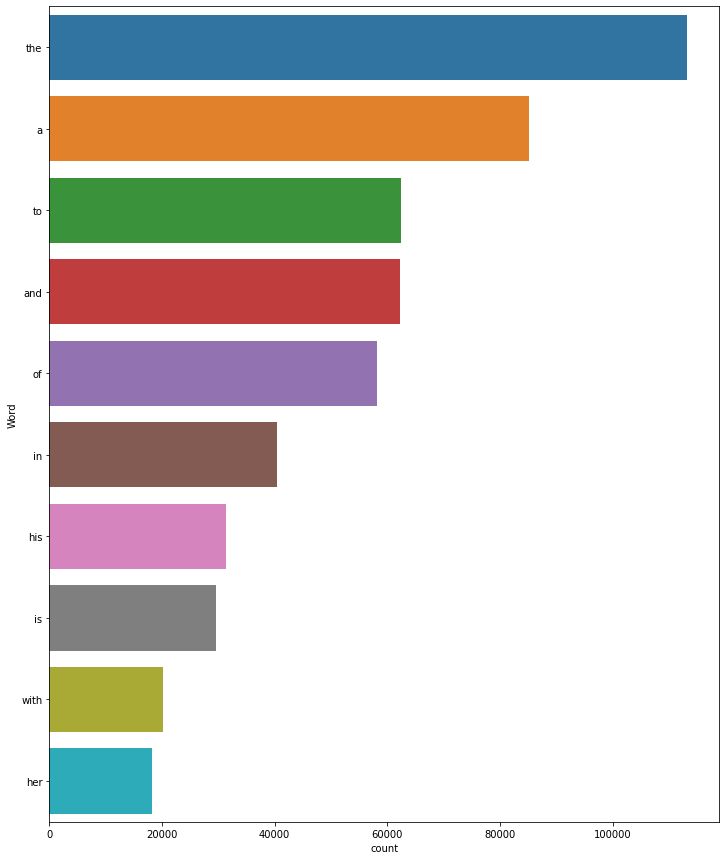

In [8]:
def freq_words(x, terms = 30): 
  words = ' '.join([text for text in x]) 
  words = words.split() 
  fdist = nltk.FreqDist(words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # top 2 frequent words
  #
  #
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualizzation
  #
  #
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# printing 10 frequent words
freq_words(movies_new['clean_plot'], 10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinavreddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


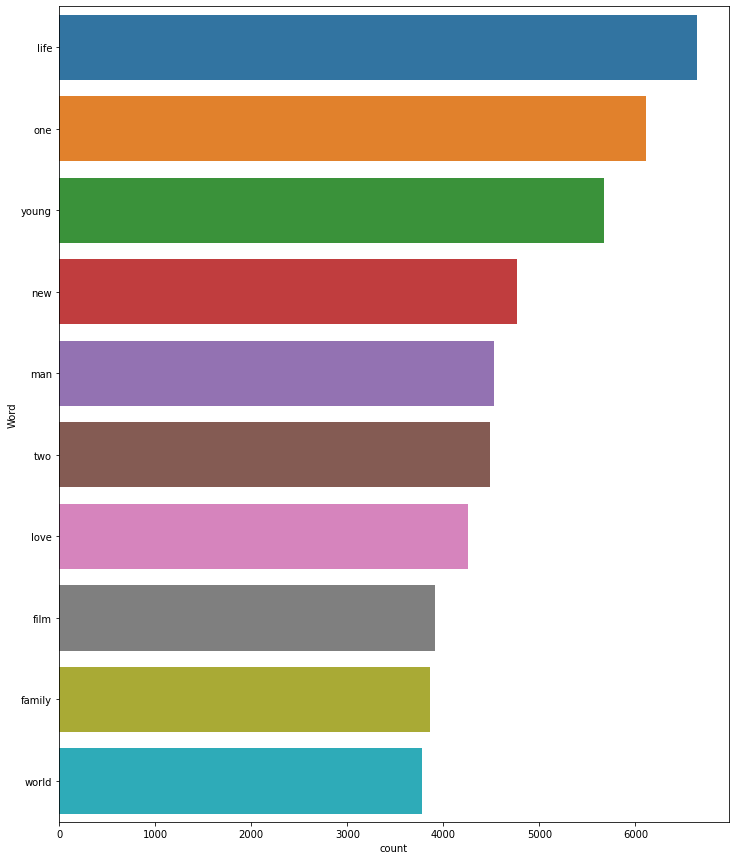

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# fRemoving stop words
#
#
def remove_stopwords(text):
    stopword_none = [w for w in text.split() if not w in stop_words]
    return ' '.join(stopword_none)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

#### Display the top 10 frequent words
freq_words(movies_new['clean_plot'], 10)